# Appliance Cluster 

## 0. Data load

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,414 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [1]:
import os
os.chdir('/content/drive/MyDrive/기상청/데이터')

In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import random
from functools import reduce
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("max_rows", 500)
pd.set_option("max_columns", 500)
pd.set_option('float_format', '{:f}'.format)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
appliance = pd.read_csv('cluster_dtw_scaling.csv', encoding='cp949')
weather = pd.read_csv('weather_final.csv', encoding='cp949')
buy_full = pd.read_csv('data.csv',encoding='CP949')

appliance.shape, weather.shape, buy_full.shape

((40, 367), (11680, 27), (2056899, 7))

In [4]:
appliance.head(2)

sm_cat     01-01    01-02     01-03     01-04     01-05     01-06  \
0    가스온수기 -0.403750 0.482756 -0.403750 -0.403750 -0.403750 -0.403750   
1  가열식 가습기  2.034589 1.327837  1.533372  1.410790  0.556221  1.201658   

     01-07     01-08    01-09    01-10     01-11    01-12     01-13    01-14  \
0 0.482756 -0.403750 0.482756 0.482756 -0.403750 0.719709 -0.403750 1.369263   
1 1.111509  1.320641 1.601883 0.970888  0.487710 0.372324  0.192026 0.329049   

     01-15    01-16     01-17    01-18     01-19     01-20     01-21  \
0 0.482756 1.606215 -0.403750 0.719709 -0.403750 -0.403750 -0.403750   
1 0.559819 0.119917  0.123515 0.119917 -0.251475 -0.017106  0.047807   

      01-22     01-23     01-24     01-25     01-26     01-27    01-28  \
0 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 1.843168   
1  0.325451  0.556221  0.549025  0.574261 -0.319986  0.206468 0.988927   

     01-29     01-30     01-31     02-01     02-02     02-03     02-04  \
0 0.482756 -0.403750 -0.403750  1.606215 -0.403750 -0.403750 -0.403750   
1 0.689646  0.393962  0.073043 -0.114452 -0.345222 -0.139688 -0.143286   

      02-05     02-06    02-07     02-08     02-09     02-10     02-11  \
0  0.719709  1.606215 1.369263 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.301946 -0.182963 0.141554  0.300215 -0.276710  0.545378  1.165579   

      02-12    02-13     02-14     02-15     02-16     02-17     02-18  \
0 -0.403750 0.482756 -0.403750  1.369263 -0.403750 -0.403750 -0.403750   
1  0.101877 0.152349 -0.085618 -0.226239 -0.460607 -0.276710  0.073043   

      02-19     02-20     02-21     02-22     02-23     02-24     02-25  \
0 -0.403750 -0.403750  0.719709 -0.403750 -0.403750 -0.403750  0.719709   
1  0.397560  0.599496 -0.092814 -0.341624 -0.319986 -0.341624 -0.298348   

     02-26     02-27     02-28     03-01     03-02     03-03     03-04  \
0 0.719709 -0.403750 -0.403750 -0.403750  1.369263 -0.403750 -0.403750   
1 0.022571 -0.363261 -0.482245 -0.575992 -0.413733 -0.575992 -0.273112   

      03-05     03-06     03-07     03-08     03-09     03-10     03-11  \
0 -0.403750  3.616180  0.719709 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.085618 -0.366860 -0.529118 -0.597630 -0.759889 -0.507481 -0.366860   

      03-12     03-13     03-14     03-15     03-16     03-17     03-18  \
0  2.966627  0.719709 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.366860 -0.478647 -0.622866 -0.644503 -0.666141 -0.619268 -0.503882   

      03-19     03-20     03-21     03-22     03-23     03-24     03-25  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.597630 -0.435371 -0.482245 -0.482245 -0.619268 -0.273112 -0.157727   

      03-26     03-27     03-28     03-29     03-30     03-31     04-01  \
0  0.719709 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.482245 -0.525520 -0.713015 -0.666141 -0.575992 -0.503882 -0.597630   

      04-02     04-03     04-04     04-05     04-06     04-07     04-08  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750  0.482756  0.482756   
1 -0.619268 -0.666141 -0.525520 -0.457009 -0.622866 -0.572394 -0.644503   

      04-09     04-10     04-11     04-12     04-13     04-14     04-15  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750 -0.403750  0.482756   
1 -0.413733 -0.435371 -0.410135 -0.713015 -0.691377 -0.666141 -0.457009   

      04-16     04-17     04-18     04-19     04-20     04-21     04-22  \
0 -0.403750 -0.403750  0.719709 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.550756 -0.482245 -0.413733 -0.691377 -0.644503 -0.759889 -0.622866   

      04-23     04-24     04-25     04-26     04-27     04-28     04-29  \
0 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.644503 -0.691377 -0.413733 -0.666141 -0.644503 -0.759889 -0.597630   

      04-30     05-01     05-02     05-03     05-04     05-05     05-06  \
0  0.482756 -0.403750 -0.403750  0.482756 -0.403750 -0.403750 -0.403750   
1 -0.644503 -0.597630 -0.61

In [5]:
weather.head(2)

날짜  지점번호      평균기온     최고기온      최저기온    일별강수량  1시간최대강수량     평균풍속  \
0  2018-01-01   105  1.300000 5.700000 -2.100000 0.000000  0.000000 3.700000   
1  2018-01-01   112 -0.300000 2.700000 -2.700000 0.000000  0.000000 1.600000   

   지역      PM10      PM25   1시간최대습도     일조시간합      최고현지기압     연  월  일  분기  요일  \
0  강릉 20.066667 13.400000 25.400000 57.900000 1023.000000  2018  1  1   1   0   
1  인천 37.518681 18.641758 67.200000 53.800000 1020.300000  2018  1  1   1   0   

   공휴일명  공휴일여부  주말여부  계절     체감온도        열지수  폭염여부  강수여부  
0  1월1일      1     0   3 7.502056 -39.701524     0     0  
1  1월1일      1     0   3 9.992379 -42.924922     0     0

In [6]:
buy_full.head(2)

date sex  age big_cat sm_cat  qty      cnt
0  20180101   F   20      식품    가공란   37 0.480964
1  20180101   F   30      식품    가공란   16 0.480964

In [7]:
weather["날짜"] = pd.to_datetime(weather['날짜'], format='%Y-%m-%d')
buy_full["date"] = pd.to_datetime(buy_full['date'], format='%Y%m%d')

In [8]:
def cluster_buy_df(c) : 
    clusterdf = appliance[appliance["cluster"] == c]
    df = buy_full[buy_full.sm_cat.isin(list(clusterdf["sm_cat"]))] 
    df = df.groupby('date').sum('qty').reset_index()[["date","qty"]]
    return df

In [9]:
def weather_correlation(buy_df, loc) : 
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(buy_df, left_on="날짜", right_on="date")
    df = df.drop(['연', '월', '일', '분기', '요일', '공휴일명', '공휴일여부', '주말여부', '계절', '폭염여부', '강수여부'], axis=1)
    co = dict(df.corr()["qty"])
    return co

In [10]:
def display_weather_correlation(buy_df) : 
    weathercorrelation = dict()
    for loc in weather.지역.unique() : 
        weathercorrelation[loc] = weather_correlation(buy_df, loc)
    
    tmp = pd.DataFrame(weathercorrelation)
    tmp = tmp.drop(['지점번호', 'qty'], axis=0)
    return tmp

In [11]:
def weather_qty_graph(loc, cluster) : 
    df_cluster = cluster_buy_df(cluster)
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(df_cluster, left_on="날짜", right_on="date")   

    for i, weathers in enumerate(['평균기온', '일별강수량', '평균풍속', 'PM10', '1시간최대습도', '최고현지기압']) : 
        plt.figure(i)
        plt.figure(figsize=(15,3))
        
        sns.lineplot(x='날짜', y='qty', data=df, size=1)
        ax2 = plt.twinx()
        sns.lineplot(x='date', y=weathers, data=df, ax=ax2, color='g', size=1)
        plt.show()

## 1. Cluster1 : 겨울 클러스터 

* 대전, 인천: 최고현지기압과 상관계수 0.6 이상

In [12]:
display_weather_correlation(cluster_buy_df(1))

강릉        인천        수원        안동        울산        제주  \
평균기온     -0.518972 -0.517256 -0.551627 -0.572846 -0.520536 -0.453832   
최고기온     -0.496031 -0.519975 -0.549894 -0.554629 -0.499105 -0.459873   
최저기온     -0.505034 -0.524278 -0.543343 -0.546846 -0.523122 -0.442799   
일별강수량    -0.069657 -0.105100 -0.093542 -0.126777 -0.100719 -0.083226   
1시간최대강수량 -0.077806 -0.099412 -0.105363 -0.143017 -0.117677 -0.114942   
평균풍속      0.202754  0.100849 -0.173381 -0.121080  0.064556  0.147474   
PM10     -0.080590  0.094311  0.054101  0.035443 -0.082822 -0.049542   
PM25     -0.048222  0.016275  0.042534  0.051695 -0.118439 -0.094686   
1시간최대습도  -0.284469 -0.395574 -0.085743 -0.044810 -0.267165 -0.372255   
일조시간합     0.013948 -0.018153  0.000315 -0.074833  0.000434 -0.197251   
최고현지기압    0.597289  0.639873  0.631363  0.622209  0.609155  0.619478   
체감온도     -0.514304 -0.500570 -0.528456 -0.540125 -0.499089 -0.447684   
열지수      -0.515948 -0.514082 -0.548848 -0.570891 -0.517746 -0.449977   

                천안        청주        대구        창원        여수        부산  \
평균기온     -0.568491 -0.557695 -0.556924 -0.525089 -0.485055 -0.490709   
최고기온     -0.555466 -0.558663 -0.538688 -0.522271 -0.481504 -0.462922   
최저기온     -0.544242 -0.543259 -0.546709 -0.514480 -0.474229 -0.494059   
일별강수량    -0.088566 -0.101430 -0.125631 -0.128208 -0.131872 -0.126148   
1시간최대강수량 -0.101159 -0.104652 -0.141179 -0.129340 -0.140144 -0.136787   
평균풍속     -0.240578 -0.266626 -0.071407 -0.027285  0.103049 -0.210419   
PM10      0.142771  0.145716  0.098054  0.013773 -0.008995 -0.045618   
PM25      0.098613  0.135814  0.096959 -0.035351 -0.052336 -0.068153   
1시간최대습도  -0.025701 -0.008456 -0.126514 -0.343948 -0.474150 -0.377389   
일조시간합    -0.058089 -0.042196  0.016712  0.049963  0.004037  0.039883   
최고현지기압    0.637482  0.639306  0.624178  0.618269  0.619886  0.610506   
체감온도     -0.535331 -0.535846 -0.522779 -0.511557 -0.460776 -0.446632   
열지수      -0.565906 -0.554395 -0.554539 -0.522613 -0.481593 -0.487687   

                서울        광주        전주        대전  
평균기온     -0.554601 -0.536146 -0.535146 -0.561528  
최고기온     -0.545881 -0.533238 -0.537989 -0.551341  
최저기온     -0.553278 -0.521228 -0.521813 -0.543846  
일별강수량    -0.118561 -0.133066 -0.115323 -0.114490  
1시간최대강수량 -0.128847 -0.130088 -0.119937 -0.121986  
평균풍속      0.038339 -0.142762 -0.028189 -0.269317  
PM10      0.050892  0.062629  0.109991  0.120204  
PM25     -0.008023  0.050902  0.130420  0.124667  
1시간최대습도  -0.210403 -0.235301 -0.248500 -0.044380  
일조시간합    -0.026602  0.002655 -0.023164 -0.044081  
최고현지기압    0.641103  0.631729  0.634815  0.638258  
체감온도     -0.542478 -0.520733 -0.519617 -0.533028  
열지수      -0.551549 -0.532703 -0.531717 -0.558697

<Figure size 576x396 with 0 Axes>

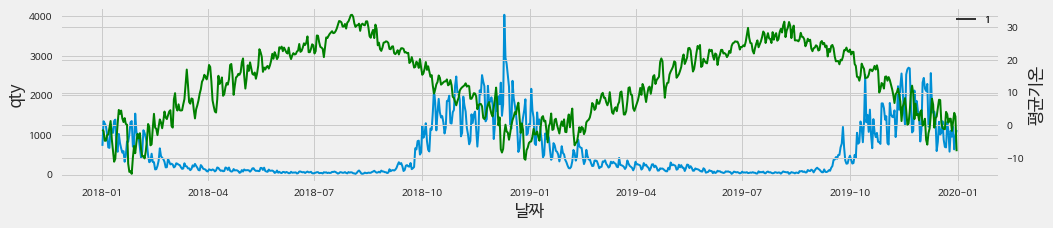

<Figure size 576x396 with 0 Axes>

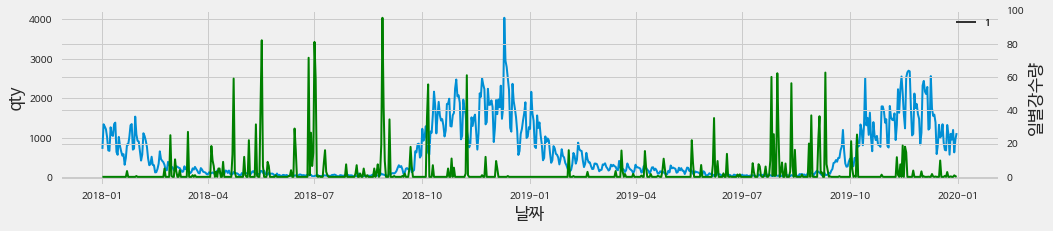

<Figure size 576x396 with 0 Axes>

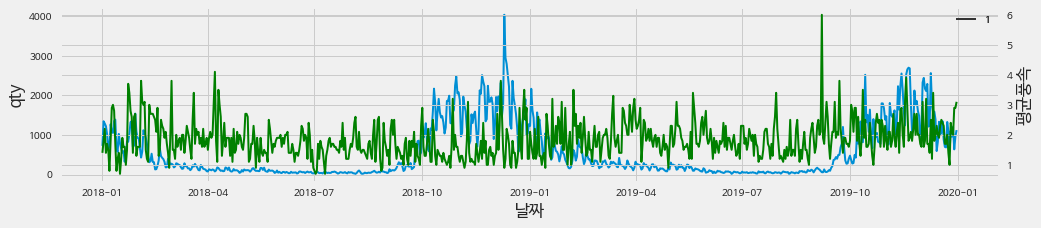

<Figure size 576x396 with 0 Axes>

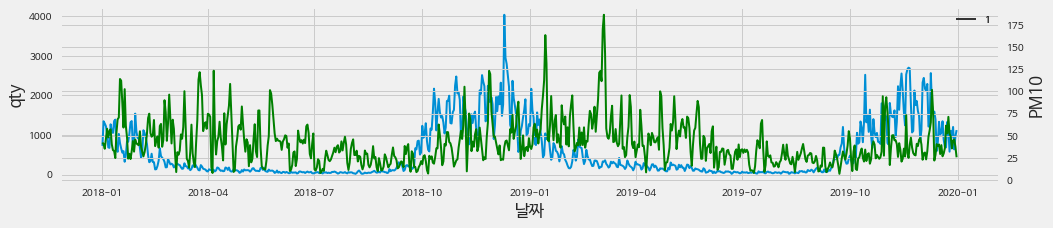

<Figure size 576x396 with 0 Axes>

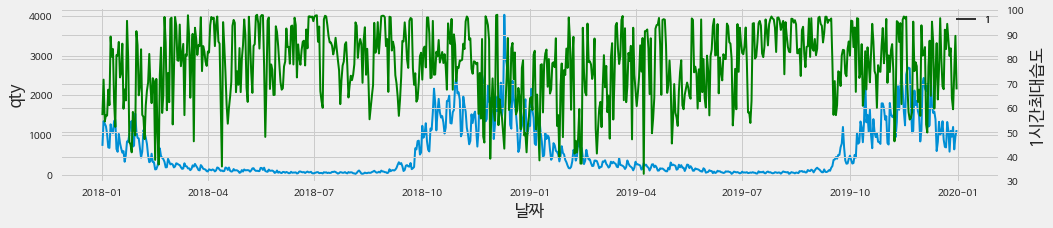

<Figure size 576x396 with 0 Axes>

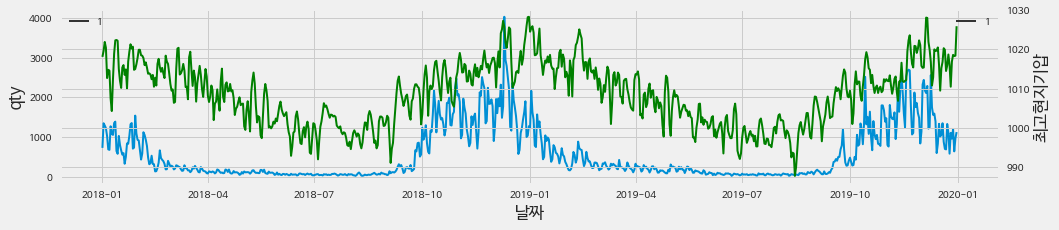

In [13]:
weather_qty_graph('서울', 1)

<Figure size 576x396 with 0 Axes>

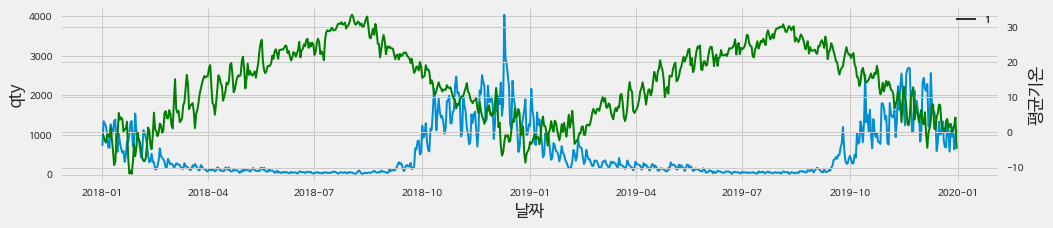

<Figure size 576x396 with 0 Axes>

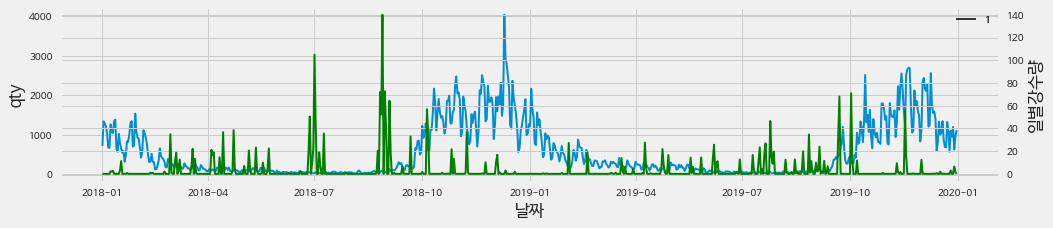

<Figure size 576x396 with 0 Axes>

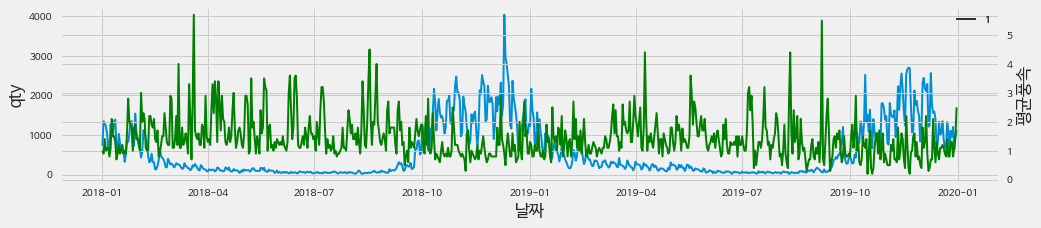

<Figure size 576x396 with 0 Axes>

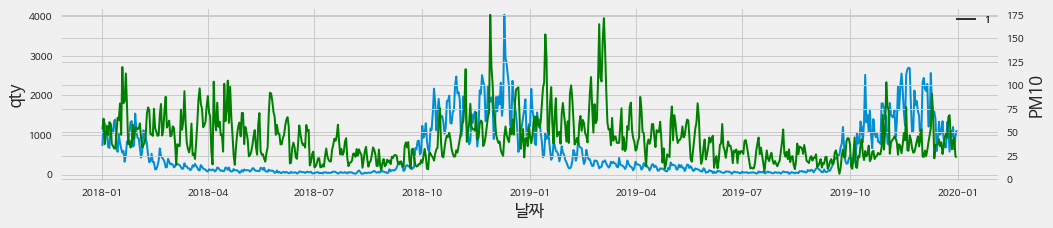

<Figure size 576x396 with 0 Axes>

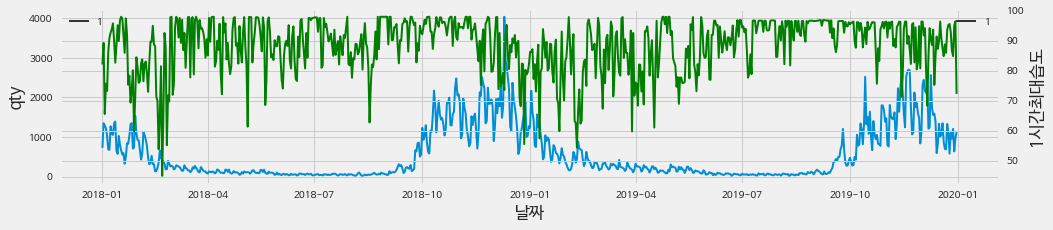

<Figure size 576x396 with 0 Axes>

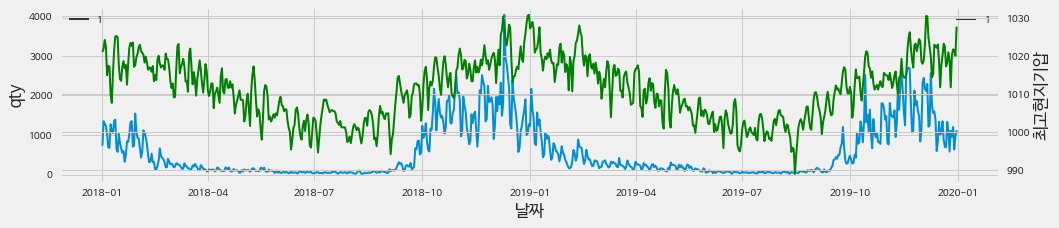

In [14]:
weather_qty_graph('대전', 1)

<Figure size 576x396 with 0 Axes>

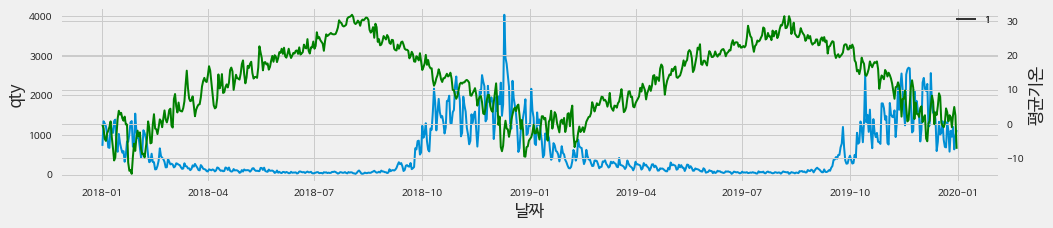

<Figure size 576x396 with 0 Axes>

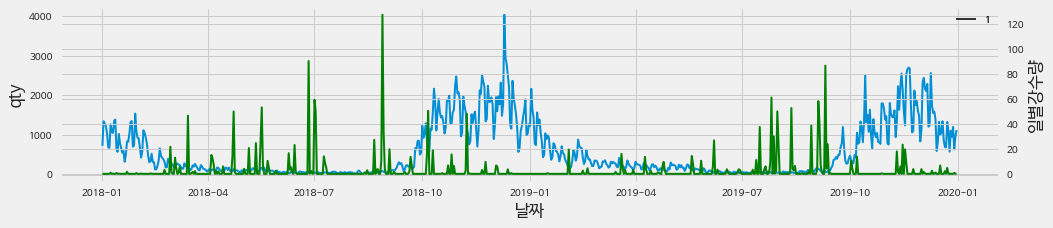

<Figure size 576x396 with 0 Axes>

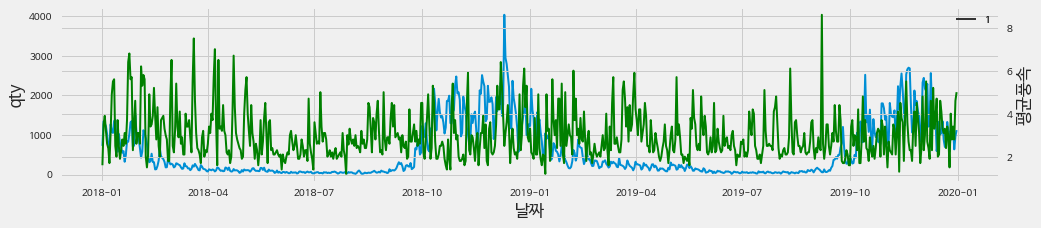

<Figure size 576x396 with 0 Axes>

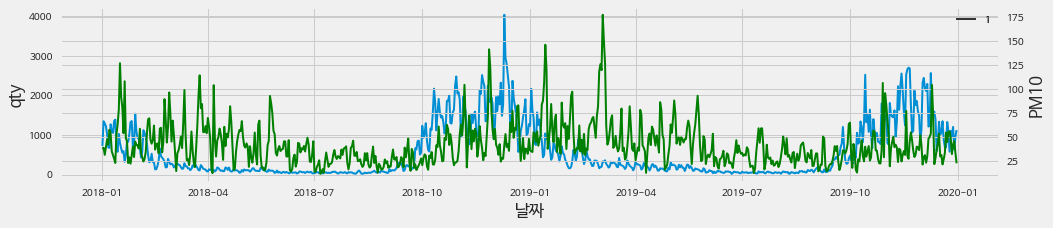

<Figure size 576x396 with 0 Axes>

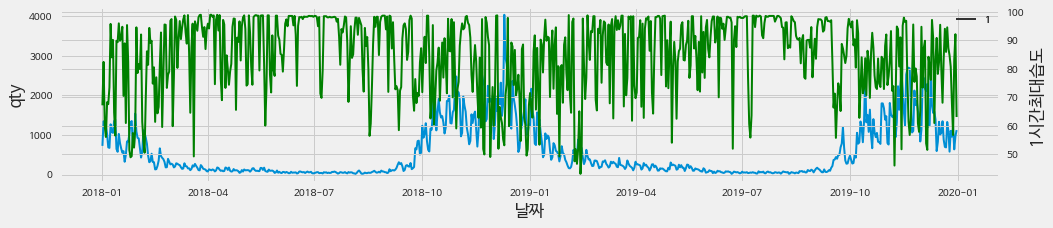

<Figure size 576x396 with 0 Axes>

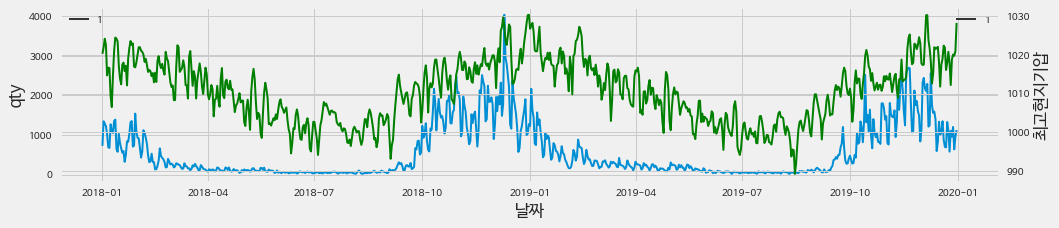

In [15]:
weather_qty_graph('인천', 1)

## 2. Cluster2 : 여름 클러스터 

* 대구, 강릉: 평균기온과 상관계수 0.62 이상

In [16]:
display_weather_correlation(cluster_buy_df(2))

강릉        인천        수원        안동        울산        제주  \
평균기온      0.620305  0.565943  0.596928  0.624497  0.596661  0.551951   
최고기온      0.604189  0.566199  0.598541  0.619372  0.594333  0.546416   
최저기온      0.611398  0.569052  0.586596  0.592021  0.578769  0.550538   
일별강수량     0.010986  0.072341  0.080925  0.034435  0.038562 -0.013762   
1시간최대강수량  0.028394  0.057932  0.086072  0.067897  0.043712  0.000069   
평균풍속     -0.177317 -0.185573  0.026236  0.008550 -0.181472 -0.157481   
PM10      0.039606 -0.151155 -0.102752 -0.108643  0.046648 -0.081025   
PM25     -0.018393 -0.080046 -0.090949 -0.167239  0.153160 -0.014730   
1시간최대습도   0.186876  0.313257  0.087446  0.124075  0.258898  0.236831   
일조시간합     0.143260  0.130580  0.115824  0.196105  0.190368  0.295206   
최고현지기압   -0.594548 -0.585350 -0.585844 -0.585879 -0.580668 -0.579287   
체감온도      0.605348  0.545170  0.583876  0.602916  0.579594  0.530123   
열지수       0.608137  0.557746  0.587220  0.613236  0.586697  0.546322   

                천안        청주        대구        창원        여수        부산  \
평균기온      0.609569  0.609589  0.624917  0.587876  0.564101  0.562680   
최고기온      0.602408  0.603608  0.619600  0.594002  0.562587  0.555449   
최저기온      0.584515  0.600749  0.600644  0.565294  0.556475  0.554771   
일별강수량     0.063426  0.078064  0.036316  0.043663  0.053169  0.046118   
1시간최대강수량  0.077291  0.097921  0.079029  0.038718  0.079553  0.031185   
평균풍속      0.012206  0.110990 -0.023838 -0.042949 -0.208746  0.076196   
PM10     -0.185069 -0.174983 -0.136209 -0.061264 -0.049582 -0.016363   
PM25     -0.144021 -0.167665 -0.100616  0.018522 -0.007367  0.044186   
1시간최대습도   0.078080 -0.028596  0.098074  0.333170  0.364820  0.327249   
일조시간합     0.193497  0.168916  0.119901  0.096810  0.166233  0.148463   
최고현지기압   -0.586160 -0.589908 -0.588701 -0.579709 -0.574372 -0.572776   
체감온도      0.599482  0.599429  0.595105  0.575852  0.534670  0.542777   
열지수       0.599369  0.598690  0.613592  0.579180  0.556631  0.554801   

                서울        광주        전주        대전  
평균기온      0.596377  0.601999  0.594737  0.611347  
최고기온      0.588803  0.600619  0.590795  0.603442  
최저기온      0.591473  0.585710  0.581750  0.594029  
일별강수량     0.102237  0.022677  0.032759  0.028077  
1시간최대강수량  0.117753  0.048038  0.068869  0.039675  
평균풍속     -0.108419  0.092356 -0.054851  0.066201  
PM10     -0.113212 -0.142924 -0.197771 -0.187973  
PM25     -0.055765 -0.124233 -0.202598 -0.158945  
1시간최대습도   0.164572  0.215120  0.204277  0.046439  
일조시간합     0.112865  0.138741  0.162110  0.158182  
최고현지기압   -0.588941 -0.582577 -0.584123 -0.589178  
체감온도      0.585470  0.589265  0.584716  0.601580  
열지수       0.585480  0.592163  0.585105  0.600627

<Figure size 576x396 with 0 Axes>

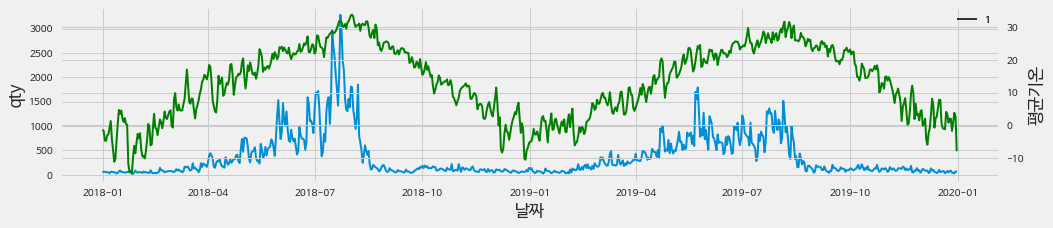

<Figure size 576x396 with 0 Axes>

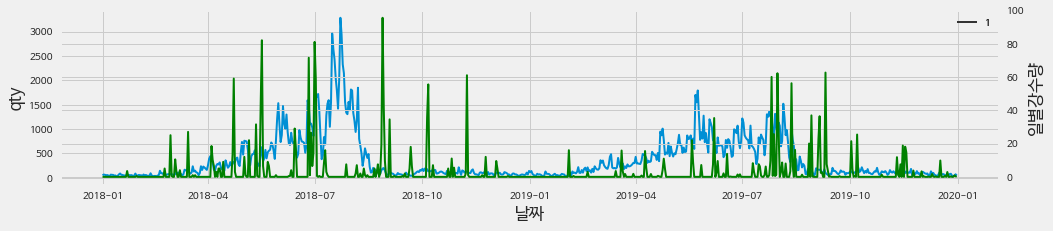

<Figure size 576x396 with 0 Axes>

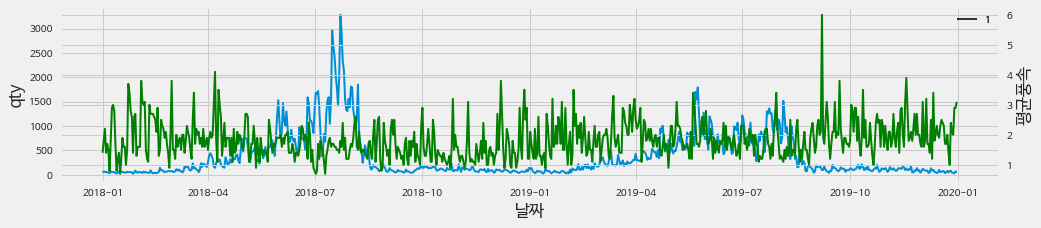

<Figure size 576x396 with 0 Axes>

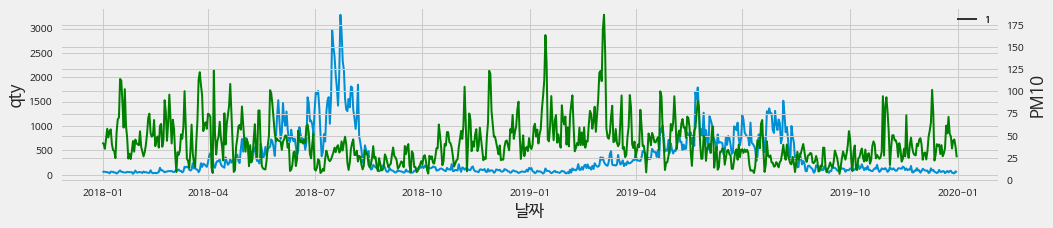

<Figure size 576x396 with 0 Axes>

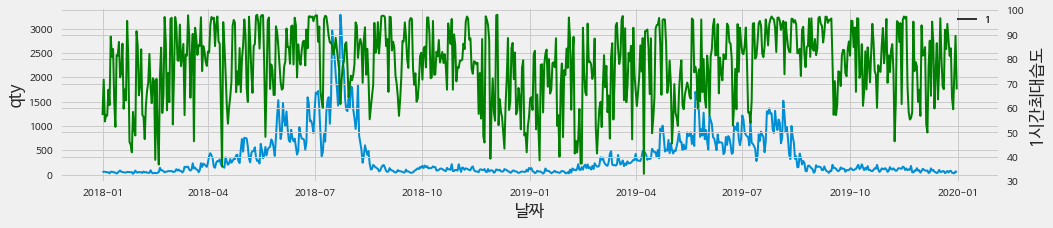

<Figure size 576x396 with 0 Axes>

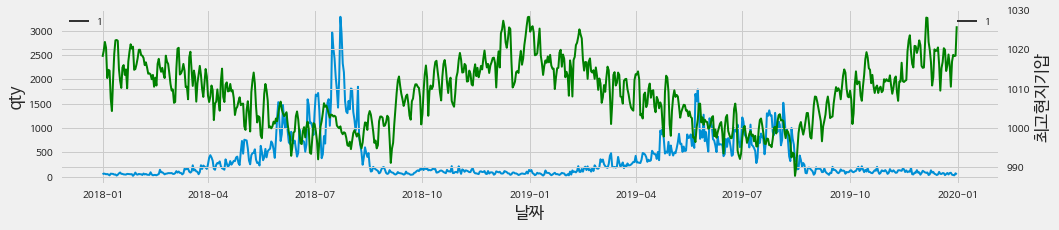

In [17]:
weather_qty_graph('서울', 2)

<Figure size 576x396 with 0 Axes>

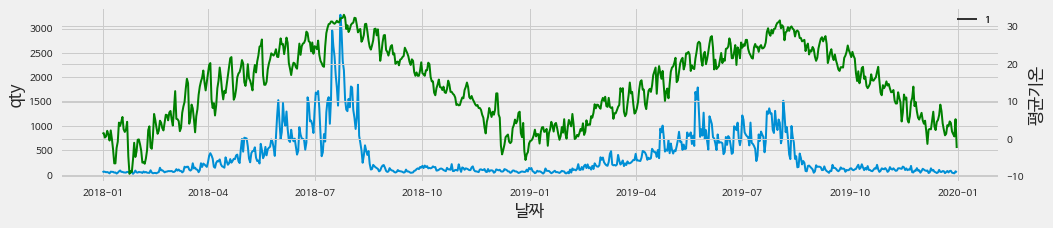

<Figure size 576x396 with 0 Axes>

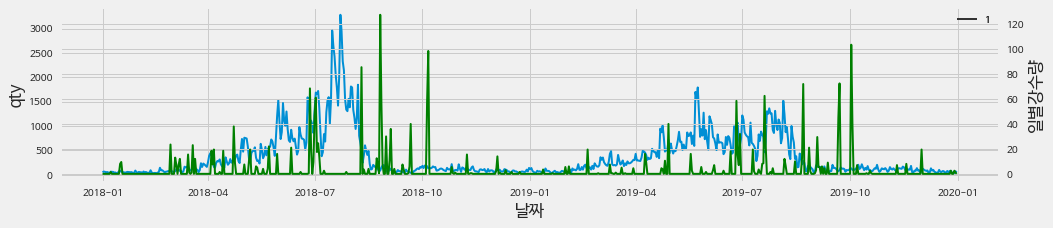

<Figure size 576x396 with 0 Axes>

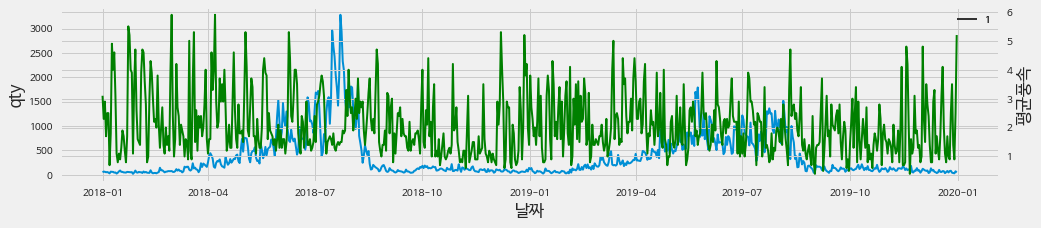

<Figure size 576x396 with 0 Axes>

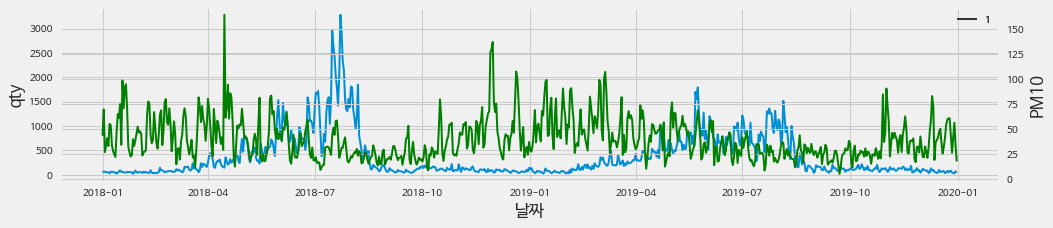

<Figure size 576x396 with 0 Axes>

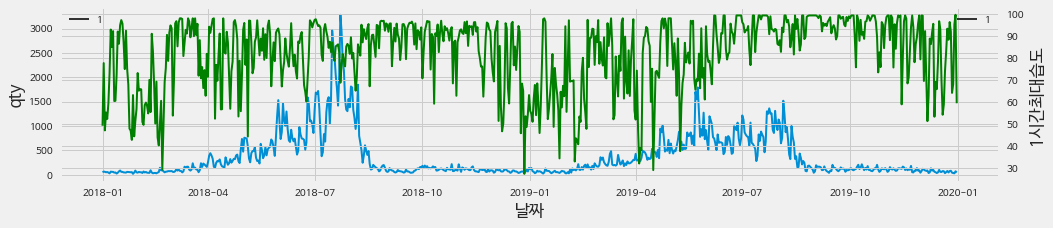

<Figure size 576x396 with 0 Axes>

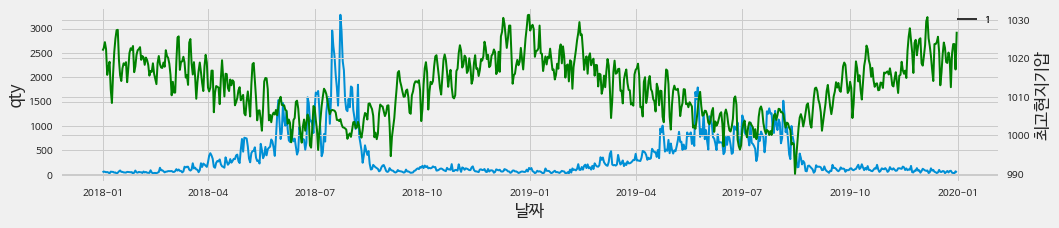

In [18]:
weather_qty_graph('대구', 2)

<Figure size 576x396 with 0 Axes>

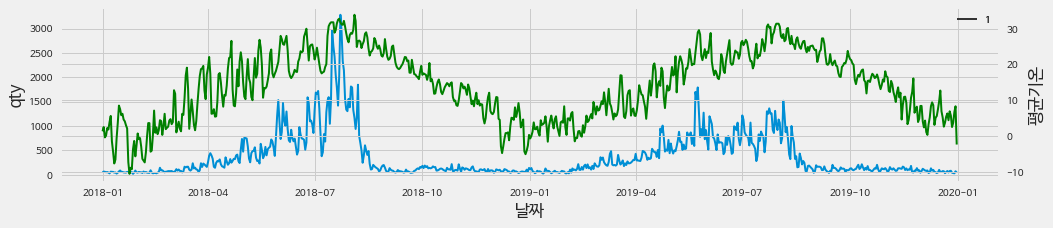

<Figure size 576x396 with 0 Axes>

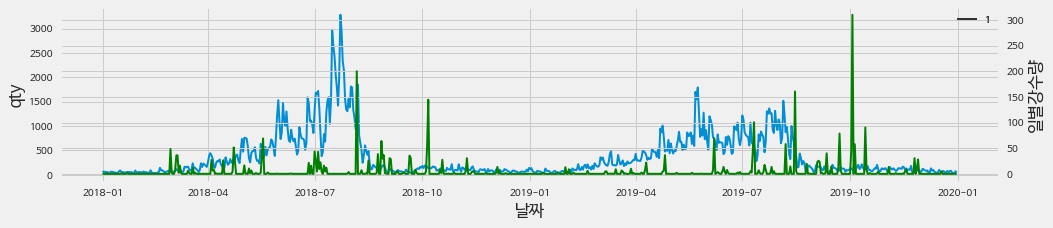

<Figure size 576x396 with 0 Axes>

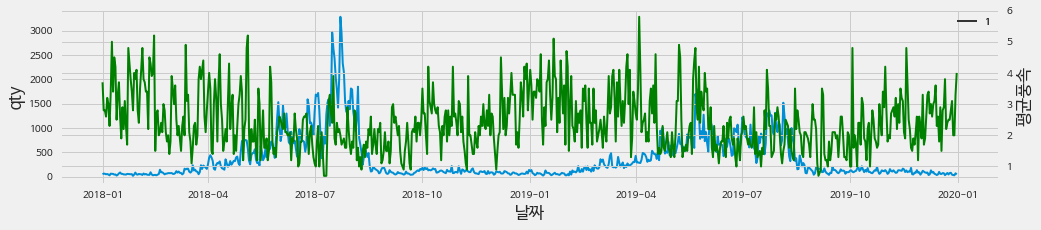

<Figure size 576x396 with 0 Axes>

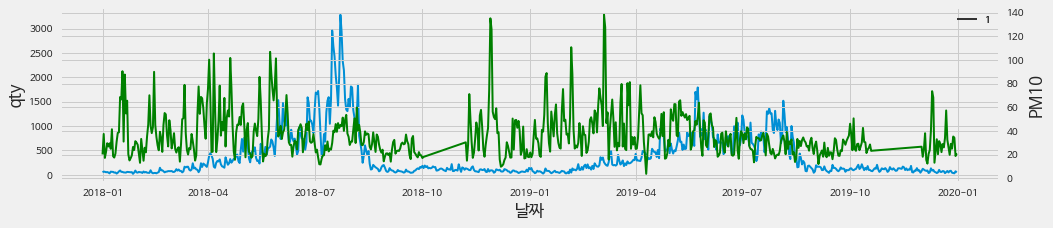

<Figure size 576x396 with 0 Axes>

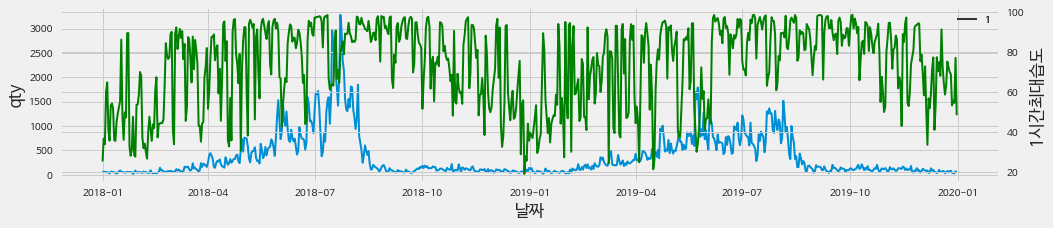

<Figure size 576x396 with 0 Axes>

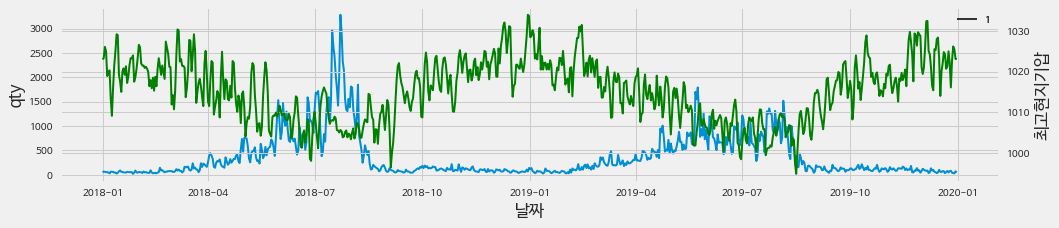

In [19]:
weather_qty_graph('강릉', 2)

## 3. Cluster0 : 결측치 많은 클러스터(공기청정기 포함)

* 천안, 수원: 미세먼지와 상관계수 0.53 이상

In [20]:
display_weather_correlation(cluster_buy_df(0))

강릉        인천        수원        안동        울산        제주  \
평균기온     -0.240935 -0.286015 -0.276133 -0.253140 -0.253342 -0.311906   
최고기온     -0.219469 -0.270300 -0.241519 -0.225923 -0.224397 -0.291664   
최저기온     -0.264882 -0.287468 -0.295331 -0.282387 -0.281440 -0.326443   
일별강수량    -0.067658 -0.063005 -0.048244 -0.059840 -0.063417 -0.065596   
1시간최대강수량 -0.059642 -0.072400 -0.063970 -0.070294 -0.070192 -0.083343   
평균풍속      0.153214  0.015412 -0.062682  0.036498  0.045641  0.009746   
PM10      0.453124  0.505203  0.542157  0.418914  0.314342  0.352209   
PM25      0.525760  0.508121  0.526850  0.407363  0.288644  0.391044   
1시간최대습도  -0.142719  0.033776  0.061650 -0.083041 -0.112333 -0.126842   
일조시간합     0.054693 -0.056034 -0.036590  0.039901  0.053765  0.025032   
최고현지기압    0.156188  0.193118  0.203604  0.183673  0.187235  0.226751   
체감온도     -0.234245 -0.264334 -0.268304 -0.249259 -0.240726 -0.286999   
열지수      -0.233684 -0.275781 -0.266499 -0.244391 -0.245163 -0.305732   

                천안        청주        대구        창원        여수        부산  \
평균기온     -0.264140 -0.260069 -0.246585 -0.267522 -0.283005 -0.269008   
최고기온     -0.230700 -0.235074 -0.217399 -0.237238 -0.261453 -0.256778   
최저기온     -0.289334 -0.283770 -0.277865 -0.289880 -0.294842 -0.274011   
일별강수량    -0.066006 -0.071875 -0.082777 -0.076207 -0.068453 -0.072450   
1시간최대강수량 -0.068976 -0.074146 -0.076801 -0.082683 -0.072253 -0.079422   
평균풍속     -0.017956 -0.075071 -0.006577 -0.013607 -0.000392  0.034320   
PM10      0.539996  0.506138  0.409507  0.348917  0.352707  0.353144   
PM25      0.513548  0.480770  0.408717  0.351287  0.356490  0.355479   
1시간최대습도  -0.118593 -0.040958 -0.109921 -0.085732 -0.122216 -0.163684   
일조시간합    -0.044428 -0.011746  0.051498  0.088277  0.038741  0.056694   
최고현지기압    0.193703  0.201872  0.189881  0.200695  0.210508  0.200497   
체감온도     -0.262774 -0.255937 -0.233506 -0.257103 -0.254619 -0.267716   
열지수      -0.254948 -0.250409 -0.238011 -0.258848 -0.274437 -0.260393   

                서울        광주        전주        대전  
평균기온     -0.262096 -0.278179 -0.278826 -0.261859  
최고기온     -0.244787 -0.243360 -0.246167 -0.237882  
최저기온     -0.272307 -0.301955 -0.301048 -0.284229  
일별강수량    -0.054350 -0.091066 -0.081165 -0.077980  
1시간최대강수량 -0.069558 -0.090047 -0.083213 -0.078147  
평균풍속      0.048748 -0.050575  0.079903 -0.014209  
PM10      0.541120  0.511045  0.487839  0.532137  
PM25      0.525871  0.513169  0.477765  0.524079  
1시간최대습도  -0.087773 -0.081582 -0.064596 -0.112932  
일조시간합    -0.046482  0.020051 -0.013149 -0.011884  
최고현지기압    0.190718  0.216292  0.212461  0.199971  
체감온도     -0.257127 -0.270358 -0.278306 -0.263323  
열지수      -0.251647 -0.270087 -0.270100 -0.252587

<Figure size 576x396 with 0 Axes>

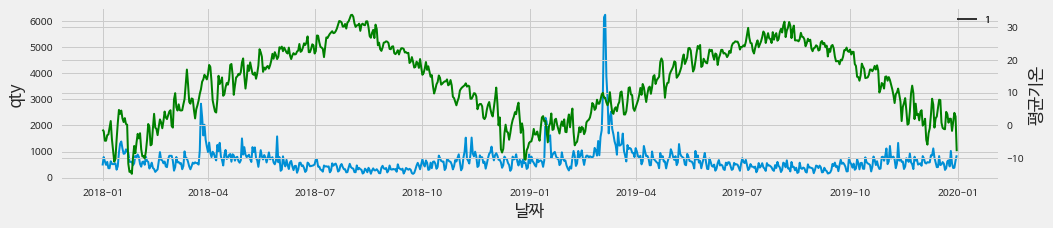

<Figure size 576x396 with 0 Axes>

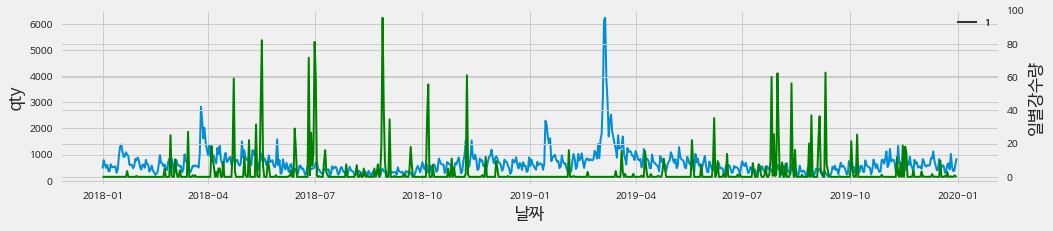

<Figure size 576x396 with 0 Axes>

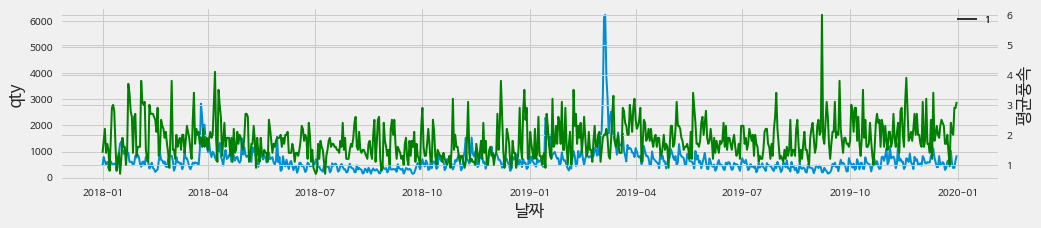

<Figure size 576x396 with 0 Axes>

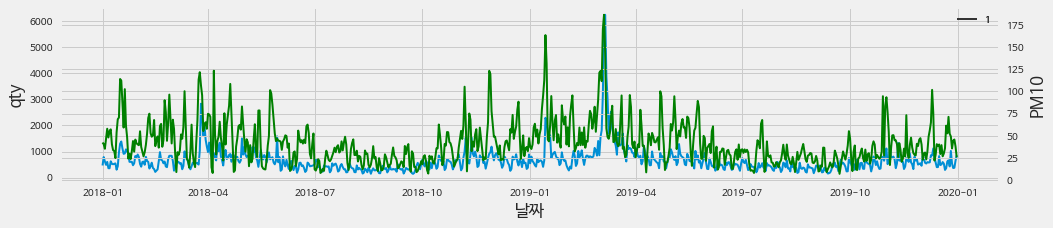

<Figure size 576x396 with 0 Axes>

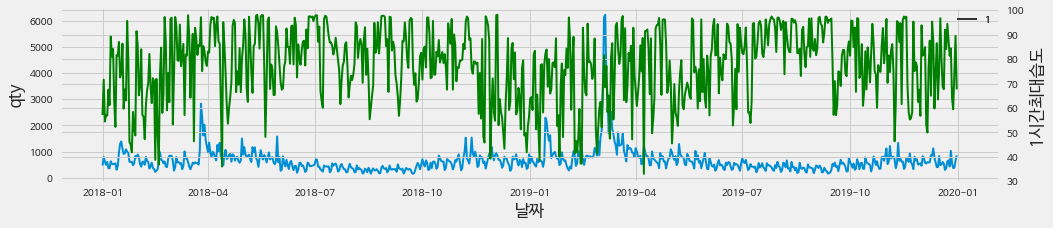

<Figure size 576x396 with 0 Axes>

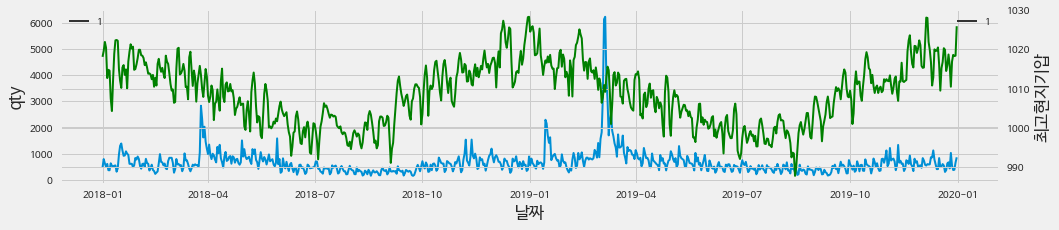

In [21]:
weather_qty_graph('서울', 0)

<Figure size 576x396 with 0 Axes>

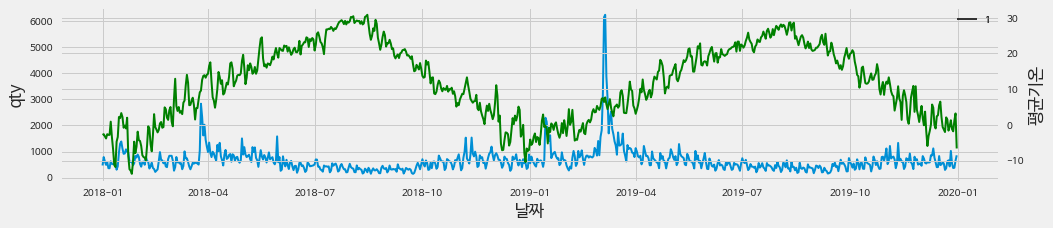

<Figure size 576x396 with 0 Axes>

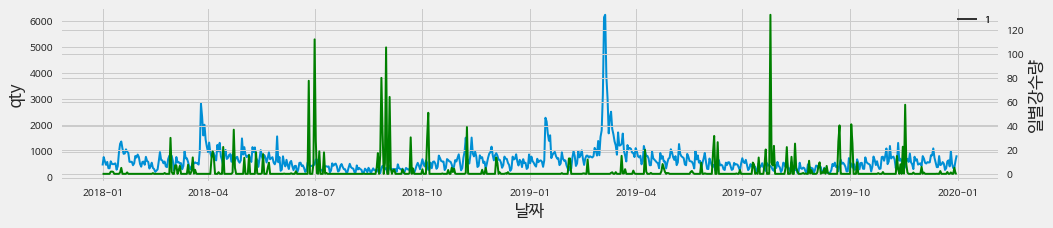

<Figure size 576x396 with 0 Axes>

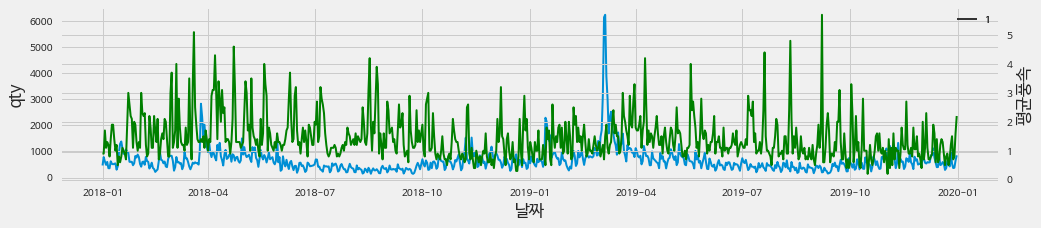

<Figure size 576x396 with 0 Axes>

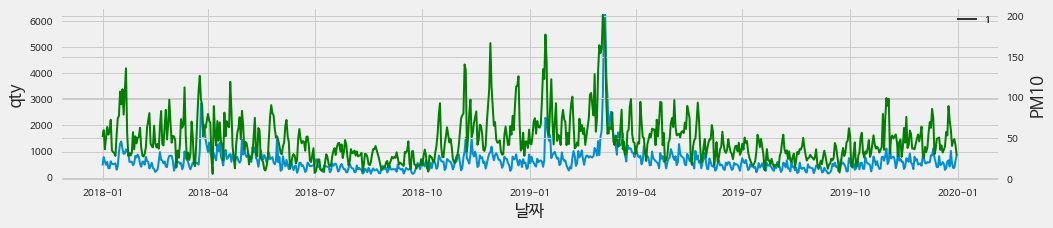

<Figure size 576x396 with 0 Axes>

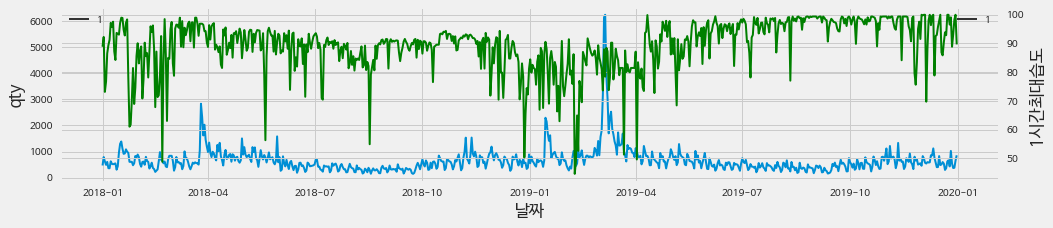

<Figure size 576x396 with 0 Axes>

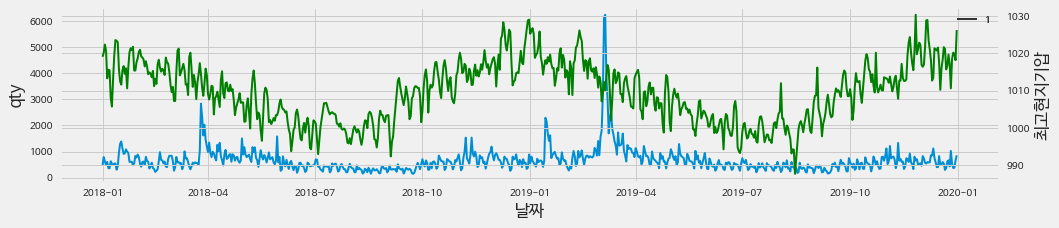

In [22]:
weather_qty_graph('천안', 0)

<Figure size 576x396 with 0 Axes>

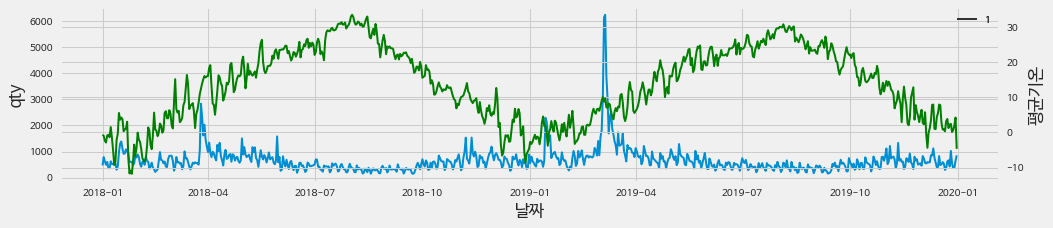

<Figure size 576x396 with 0 Axes>

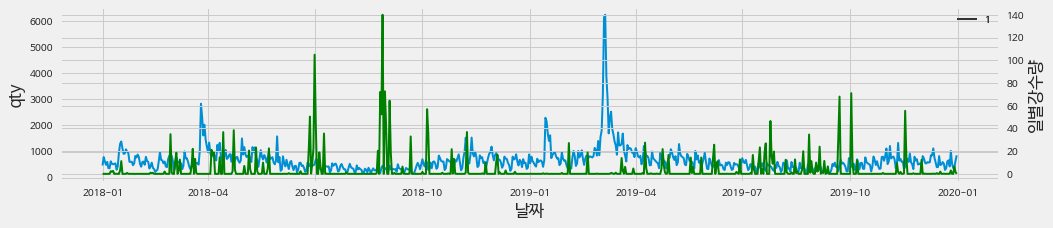

<Figure size 576x396 with 0 Axes>

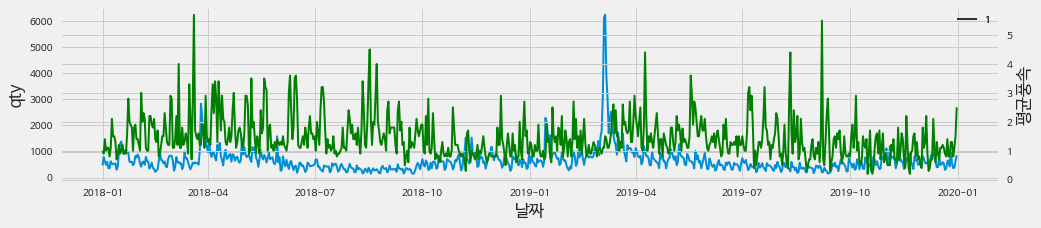

<Figure size 576x396 with 0 Axes>

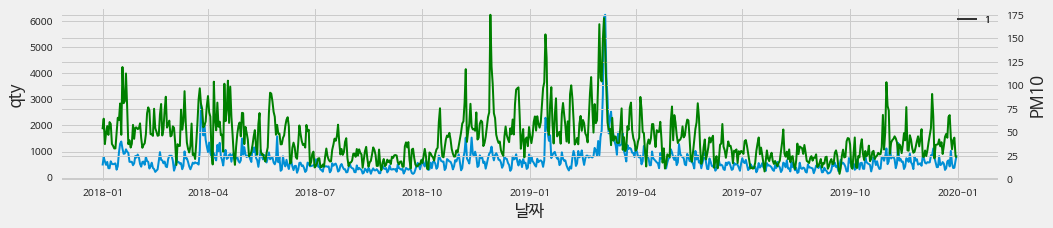

<Figure size 576x396 with 0 Axes>

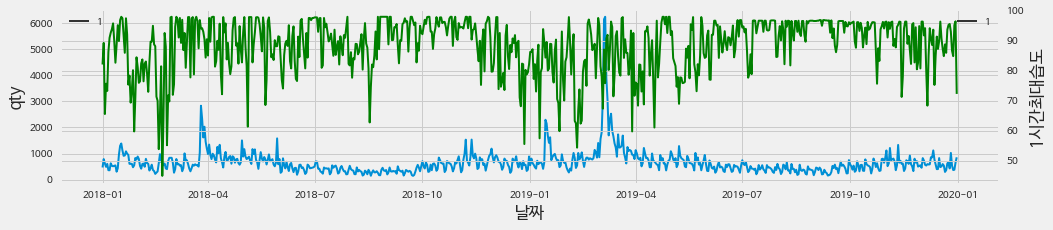

<Figure size 576x396 with 0 Axes>

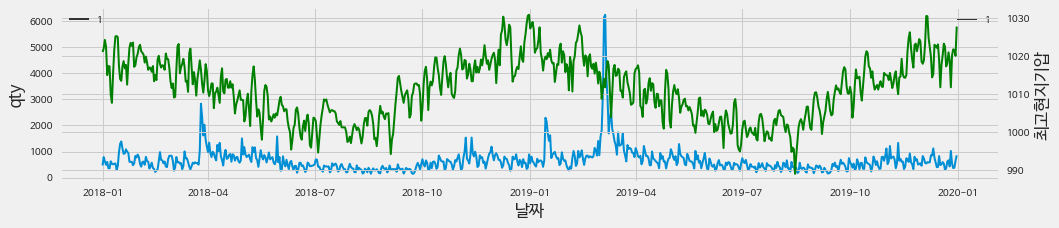

In [23]:
weather_qty_graph('대전', 0)

## 4. Data

In [24]:
buy_full.head(2)

date sex  age big_cat sm_cat  qty      cnt
0 2018-01-01   F   20      식품    가공란   37 0.480964
1 2018-01-01   F   30      식품    가공란   16 0.480964

In [25]:
appliance.head(2)

sm_cat     01-01    01-02     01-03     01-04     01-05     01-06  \
0    가스온수기 -0.403750 0.482756 -0.403750 -0.403750 -0.403750 -0.403750   
1  가열식 가습기  2.034589 1.327837  1.533372  1.410790  0.556221  1.201658   

     01-07     01-08    01-09    01-10     01-11    01-12     01-13    01-14  \
0 0.482756 -0.403750 0.482756 0.482756 -0.403750 0.719709 -0.403750 1.369263   
1 1.111509  1.320641 1.601883 0.970888  0.487710 0.372324  0.192026 0.329049   

     01-15    01-16     01-17    01-18     01-19     01-20     01-21  \
0 0.482756 1.606215 -0.403750 0.719709 -0.403750 -0.403750 -0.403750   
1 0.559819 0.119917  0.123515 0.119917 -0.251475 -0.017106  0.047807   

      01-22     01-23     01-24     01-25     01-26     01-27    01-28  \
0 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 1.843168   
1  0.325451  0.556221  0.549025  0.574261 -0.319986  0.206468 0.988927   

     01-29     01-30     01-31     02-01     02-02     02-03     02-04  \
0 0.482756 -0.403750 -0.403750  1.606215 -0.403750 -0.403750 -0.403750   
1 0.689646  0.393962  0.073043 -0.114452 -0.345222 -0.139688 -0.143286   

      02-05     02-06    02-07     02-08     02-09     02-10     02-11  \
0  0.719709  1.606215 1.369263 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.301946 -0.182963 0.141554  0.300215 -0.276710  0.545378  1.165579   

      02-12    02-13     02-14     02-15     02-16     02-17     02-18  \
0 -0.403750 0.482756 -0.403750  1.369263 -0.403750 -0.403750 -0.403750   
1  0.101877 0.152349 -0.085618 -0.226239 -0.460607 -0.276710  0.073043   

      02-19     02-20     02-21     02-22     02-23     02-24     02-25  \
0 -0.403750 -0.403750  0.719709 -0.403750 -0.403750 -0.403750  0.719709   
1  0.397560  0.599496 -0.092814 -0.341624 -0.319986 -0.341624 -0.298348   

     02-26     02-27     02-28     03-01     03-02     03-03     03-04  \
0 0.719709 -0.403750 -0.403750 -0.403750  1.369263 -0.403750 -0.403750   
1 0.022571 -0.363261 -0.482245 -0.575992 -0.413733 -0.575992 -0.273112   

      03-05     03-06     03-07     03-08     03-09     03-10     03-11  \
0 -0.403750  3.616180  0.719709 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.085618 -0.366860 -0.529118 -0.597630 -0.759889 -0.507481 -0.366860   

      03-12     03-13     03-14     03-15     03-16     03-17     03-18  \
0  2.966627  0.719709 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.366860 -0.478647 -0.622866 -0.644503 -0.666141 -0.619268 -0.503882   

      03-19     03-20     03-21     03-22     03-23     03-24     03-25  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.597630 -0.435371 -0.482245 -0.482245 -0.619268 -0.273112 -0.157727   

      03-26     03-27     03-28     03-29     03-30     03-31     04-01  \
0  0.719709 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.482245 -0.525520 -0.713015 -0.666141 -0.575992 -0.503882 -0.597630   

      04-02     04-03     04-04     04-05     04-06     04-07     04-08  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750  0.482756  0.482756   
1 -0.619268 -0.666141 -0.525520 -0.457009 -0.622866 -0.572394 -0.644503   

      04-09     04-10     04-11     04-12     04-13     04-14     04-15  \
0 -0.403750  0.482756 -0.403750 -0.403750 -0.403750 -0.403750  0.482756   
1 -0.413733 -0.435371 -0.410135 -0.713015 -0.691377 -0.666141 -0.457009   

      04-16     04-17     04-18     04-19     04-20     04-21     04-22  \
0 -0.403750 -0.403750  0.719709 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.550756 -0.482245 -0.413733 -0.691377 -0.644503 -0.759889 -0.622866   

      04-23     04-24     04-25     04-26     04-27     04-28     04-29  \
0 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750 -0.403750   
1 -0.644503 -0.691377 -0.413733 -0.666141 -0.644503 -0.759889 -0.597630   

      04-30     05-01     05-02     05-03     05-04     05-05     05-06  \
0  0.482756 -0.403750 -0.403750  0.482756 -0.403750 -0.403750 -0.403750   
1 -0.644503 -0.597630 -0.61

In [26]:
weather.head(2)

날짜  지점번호      평균기온     최고기온      최저기온    일별강수량  1시간최대강수량     평균풍속  \
0 2018-01-01   105  1.300000 5.700000 -2.100000 0.000000  0.000000 3.700000   
1 2018-01-01   112 -0.300000 2.700000 -2.700000 0.000000  0.000000 1.600000   

   지역      PM10      PM25   1시간최대습도     일조시간합      최고현지기압     연  월  일  분기  요일  \
0  강릉 20.066667 13.400000 25.400000 57.900000 1023.000000  2018  1  1   1   0   
1  인천 37.518681 18.641758 67.200000 53.800000 1020.300000  2018  1  1   1   0   

   공휴일명  공휴일여부  주말여부  계절     체감온도        열지수  폭염여부  강수여부  
0  1월1일      1     0   3 7.502056 -39.701524     0     0  
1  1월1일      1     0   3 9.992379 -42.924922     0     0

In [27]:
buy_app = buy_full[buy_full.big_cat == '냉난방가전'].reset_index(drop=True)

In [28]:
def cluster_weather_region(c, region) : 
    clusterdf = appliance[appliance["cluster"] == c]
    df = buy_app[buy_app.sm_cat.isin(list(clusterdf["sm_cat"]))] 
    weather_region = weather[weather.지역.isin(region)].reset_index(drop=True)
    df_merge = pd.merge(df, weather_region, how='left', left_on='date', right_on='날짜')
    return df_merge

In [29]:
cluster0 = cluster_weather_region(0, ['서울','천안','수원'])
cluster1 = cluster_weather_region(1, ['서울','대전','인천'])
cluster2 = cluster_weather_region(2, ['서울','대구','강릉'])

In [30]:
print(cluster0.shape)
print(cluster1.shape)
print(cluster2.shape)

(108138, 34)
(154647, 34)
(124896, 34)


In [31]:
cluster = pd.concat([cluster0, cluster1, cluster2]).reset_index(drop=True)

In [32]:
cluster.head(2)

date sex  age big_cat   sm_cat  qty      cnt         날짜  지점번호  \
0 2018-01-01   F   20   냉난방가전  공기정화 용품   10 0.991815 2018-01-01   119   
1 2018-01-01   F   20   냉난방가전  공기정화 용품   10 0.991815 2018-01-01   232   

       평균기온     최고기온      최저기온    일별강수량  1시간최대강수량     평균풍속  지역      PM10  \
0 -1.700000 4.700000 -6.900000 0.000000  0.000000 1.000000  수원 42.782895   
1 -2.800000 3.800000 -8.500000 0.000000  0.000000 0.900000  천안 51.750000   

       PM25   1시간최대습도     일조시간합      최고현지기압     연  월  일  분기  요일  공휴일명  공휴일여부  \
0 21.375000 84.700000 52.700000 1025.100000  2018  1  1   1   0  1월1일      1   
1 26.444444 88.800000 50.500000 1019.100000  2018  1  1   1   0  1월1일      1   

   주말여부  계절      체감온도        열지수  폭염여부  강수여부  
0     0   3 10.136402 -45.791893     0     0  
1     0   3  9.582651 -48.073016     0     0

In [18]:
print(cluster.shape)

(387681, 34)


In [19]:
cluster.to_csv('/content/drive/MyDrive/기상청/데이터/cluster_correlation.csv', encoding='CP949', index = False)